#Install

In [ ]:
! pip install ucimlrepo ydata_profiling featuretools optuna

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2a3b4f2face1ca317514b348b6450038c3f3f7360adc251ae1bf72758e3bd5fa
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebf

# Lib

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import chi2_contingency, pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

import featuretools as ft
from scipy.stats import chi2_contingency

from sklearn import datasets
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_log_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor

import optuna

In [ ]:
# from ucimlrepo import fetch_ucirepo

# # fetch dataset
# room_occupancy_estimation = fetch_ucirepo(id=864)

# # data (as pandas dataframes)
# X = room_occupancy_estimation.data.features
# y = room_occupancy_estimation.data.targets

# # metadata
# print(room_occupancy_estimation.metadata)

# # variable information
# print(room_occupancy_estimation.variables)
# room_occupancy_data = pd.DataFrame(room_occupancy_estimation.data.original)

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

heart_disease_data = pd.DataFrame(heart_disease.data.original)

In [ ]:
from IPython.display import Markdown, display

text = heart_disease.metadata.additional_info.variable_info
display(Markdown(f"```\n{text}\n```"))

```
Only 14 attributes used:
      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        
      4. #10 (trestbps)  
      5. #12 (chol)      
      6. #16 (fbs)       
      7. #19 (restecg)   
      8. #32 (thalach)   
      9. #38 (exang)     
      10. #40 (oldpeak)   
      11. #41 (slope)     
      12. #44 (ca)        
      13. #51 (thal)      
      14. #58 (num)       (the predicted attribute)

Complete attribute documentation:
      1 id: patient identification number
      2 ccf: social security number (I replaced this with a dummy value of 0)
      3 age: age in years
      4 sex: sex (1 = male; 0 = female)
      5 painloc: chest pain location (1 = substernal; 0 = otherwise)
      6 painexer (1 = provoked by exertion; 0 = otherwise)
      7 relrest (1 = relieved after rest; 0 = otherwise)
      8 pncaden (sum of 5, 6, and 7)
      9 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     11 htn
     12 chol: serum cholestoral in mg/dl
     13 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     14 cigs (cigarettes per day)
     15 years (number of years as a smoker)
     16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     17 dm (1 = history of diabetes; 0 = no such history)
     18 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     20 ekgmo (month of exercise ECG reading)
     21 ekgday(day of exercise ECG reading)
     22 ekgyr (year of exercise ECG reading)
     23 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     24 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     25 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     26 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     27 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     28 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton 
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     29 thaldur: duration of exercise test in minutes
     30 thaltime: time when ST measure depression was noted
     31 met: mets achieved
     32 thalach: maximum heart rate achieved
     33 thalrest: resting heart rate
     34 tpeakbps: peak exercise blood pressure (first of 2 parts)
     35 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     36 dummy
     37 trestbpd: resting blood pressure
     38 exang: exercise induced angina (1 = yes; 0 = no)
     39 xhypo: (1 = yes; 0 = no)
     40 oldpeak = ST depression induced by exercise relative to rest
     41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     42 rldv5: height at rest
     43 rldv5e: height at peak exercise
     44 ca: number of major vessels (0-3) colored by flourosopy
     45 restckm: irrelevant
     46 exerckm: irrelevant
     47 restef: rest raidonuclid (sp?) ejection fraction
     48 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     49 exeref: exercise radinalid (sp?) ejection fraction
     50 exerwm: exercise wall (sp?) motion 
     51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
     52 thalsev: not used
     53 thalpul: not used
     54 earlobe: not used
     55 cmo: month of cardiac cath (sp?)  (perhaps "call")
     56 cday: day of cardiac cath (sp?)
     57 cyr: year of cardiac cath (sp?)
     58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     59 lmt
     60 ladprox
     61 laddist
     62 diag
     63 cxmain
     64 ramus
     65 om1
     66 om2
     67 rcaprox
     68 rcadist
     69 lvx1: not used
     70 lvx2: not used
     71 lvx3: not used
     72 lvx4: not used
     73 lvf: not used
     74 cathef: not used
     75 junk: not used
     76 name: last name of patient  (I replaced this with the dummy string "name")
```

In [ ]:
all_features_lst = heart_disease.data.features.columns.tolist()

In [ ]:
heart_disease.variables.description

,description
0,None
1,None
2,None
3,resting blood pressure (on admission to the ho...
4,serum cholestoral
5,fasting blood sugar > 120 mg/dl
6,None
7,maximum heart rate achieved
8,exercise induced angina
9,ST depression induced by exercise relative to ...


In [ ]:
heart_disease_report = ProfileReport(heart_disease_data.copy(), title="Heart Disease Data Profiling Report")

In [ ]:
heart_disease_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 25.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Preprocess

## Anomaly

In [ ]:
def plot_histogram(df, column):
    """Plot histogram of a single column with 30 bins."""
    plt.figure(figsize=(8, 5))
    df[column].dropna().hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def detect_iqr_outliers(series):
    """
    Detect outliers in a pandas Series using the IQR method.
    Returns a boolean Series: True for outliers, False otherwise.
    """
    q1 = series.quantile(0.25).item()
    q3 = series.quantile(0.75).item()
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

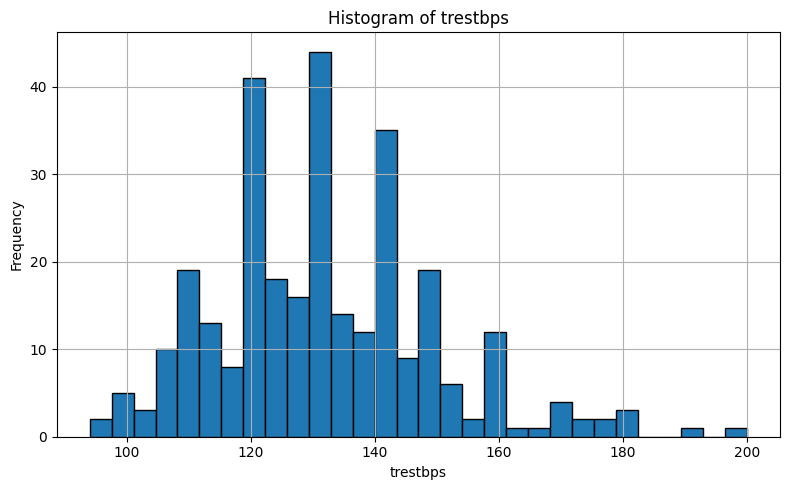

In [ ]:
plot_histogram(heart_disease_data.copy(), "trestbps")

In [ ]:
detect_iqr_outliers(heart_disease_data["trestbps"])

(90.0, 170.0)

**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)  
The histogram reveals a long-tailed distribution, with a few values exceeding 180.  
The IQR upper bound is 180, so any value above this is considered an outlier.  
👉 Therefore, we will **remove rows where trestbps > 180**.


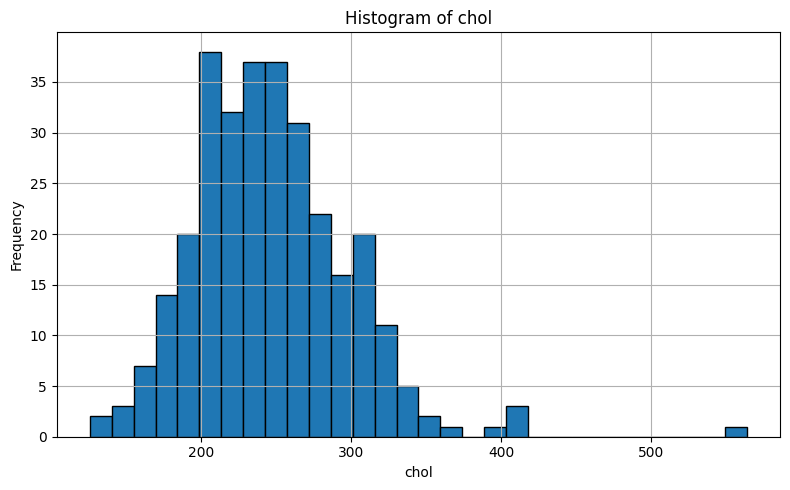

In [ ]:
plot_histogram(heart_disease_data.copy(), "chol")

In [ ]:
detect_iqr_outliers(heart_disease_data["chol"])

(115.0, 371.0)

**chol**: serum cholestoral in mg/dl  
The histogram shows a long-tailed distribution, with some data points above 400.  
The IQR upper bound is 400, so values beyond this are classified as outliers.  
👉 We will **remove rows where chol > 400**.


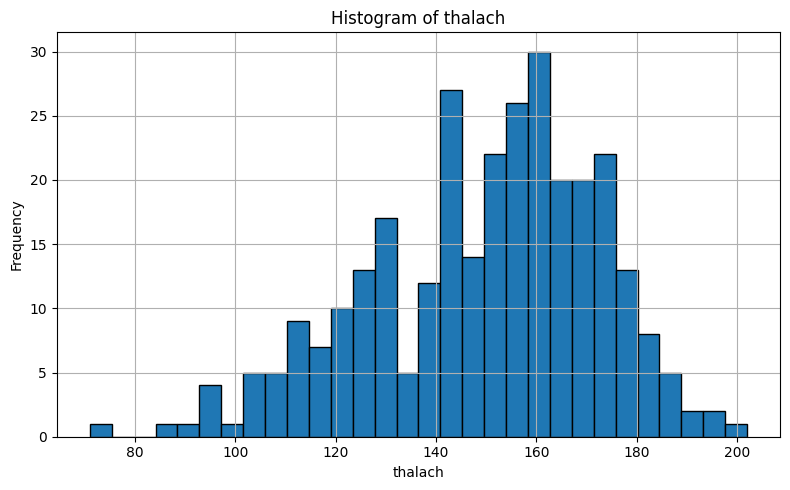

In [ ]:
plot_histogram(heart_disease_data.copy(), "thalach")

In [ ]:
detect_iqr_outliers(heart_disease_data["thalach"])

(84.75, 214.75)

**thalach**: maximum heart rate achieved  
The histogram reveals a left-skewed distribution, with a few abnormally low values.  
The IQR lower bound is 80, meaning any value below this is considered an outlier.  
👉 We will **remove rows where thalach < 80**.

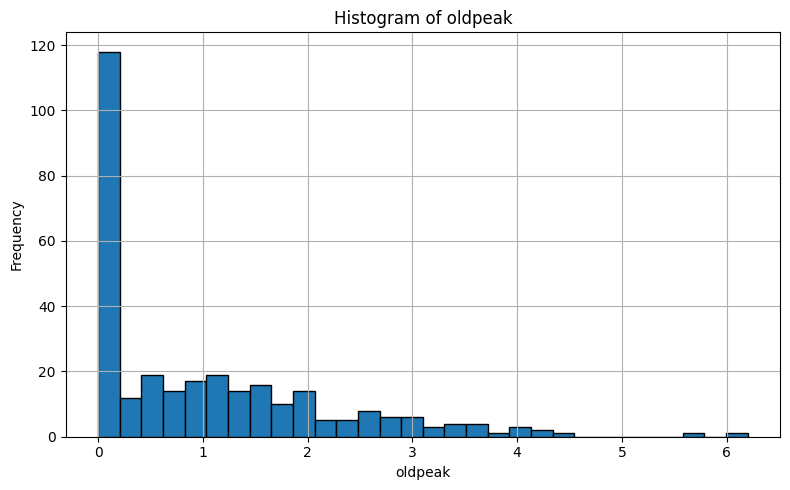

In [ ]:
plot_histogram(heart_disease_data.copy(), "oldpeak")

**need to binarize `oldpeak`**

We observed that `oldpeak` has about 30% of its values as `0`, while the remaining non-zero values are uniformly distributed among integers (e.g., 1, 2, 3, ...).  
To simplify this feature and reduce noise:

## Preprocess features

In [ ]:
preprocess_hrt_dss = heart_disease_data[(heart_disease_data["trestbps"]<=180)
                                    &(heart_disease_data["thal"].isin([3,6,7]))
                                    &(heart_disease_data["thalach"]>=80)
                                    &(heart_disease_data["chol"]<=400)].reset_index(drop=True)

**Feature Transformation: Binarizing Sparse Feature**

**`oldpeak`**
- We created **st_dep_exercise**:  
  - `0` → kept as `0`  
  - Any value `> 0` → converted to `1`

- This helps highlight the **presence or absence of the behavior**, rather than modeling the exact values.

- The original feature was then dropped to avoid redundancy.

**`restecg` (Resting ECG Results)**

- **Original feature (`restecg`)** represents categorical ECG results:
  - `0`: Normal
  - `1`: ST-T wave abnormality (very rare in data: only 4 cases out of 300)
  - `2`: Probable or definite left ventricular hypertrophy

- Since value `1` is very underrepresented, and both `1` and `2` indicate abnormal ECG results,
  we grouped them into a single category.

- A new binary column `restecg_abnormal` was created:
  - `0`: Normal ECG
  - `1`: Any abnormal ECG (value > 0)

- The original `restecg` column was dropped for simplicity.

Same transformation applied to `slope`


In [ ]:
preprocess_hrt_dss["st_dep_exercise"] = (preprocess_hrt_dss["oldpeak"]>0).astype(int)
preprocess_hrt_dss = preprocess_hrt_dss.drop(columns=["oldpeak"])

In [ ]:
preprocess_hrt_dss["restecg_abnormal"] = (preprocess_hrt_dss["restecg"] > 0).astype(int)
preprocess_hrt_dss.drop(columns=["restecg"], inplace=True)

preprocess_hrt_dss["slope_up"] = (preprocess_hrt_dss["slope"] == 1).astype(int)
preprocess_hrt_dss.drop(columns=["slope"], inplace=True)

In [ ]:
def knn_impute(df, n_neighbors=3):
    """
    Impute missing values in a DataFrame using K-Nearest Neighbors.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        n_neighbors (int): Number of neighbors to use for imputation

    Returns:
        pd.DataFrame: DataFrame with imputed values
    """
    original_dtypes = df.dtypes
    # Standardize numerical data
    scaler = StandardScaler()
    standardized_df = scaler.fit_transform(df.copy())

    # All categorical variables are already order encoded
    imputer = KNNImputer(n_neighbors=n_neighbors)
    imputed_array = imputer.fit_transform(standardized_df.copy())
    # Inverse transform to original scale
    unscaled = scaler.inverse_transform(imputed_array)

    imputed_df = pd.DataFrame(unscaled, columns=df.columns, index=df.index)

    # Restore original dtypes
    for col in df.columns:
        if pd.api.types.is_integer_dtype(original_dtypes[col]):
            imputed_df[col] = np.round(imputed_df[col]).astype(int)
        elif pd.api.types.is_categorical_dtype(original_dtypes[col]):
            imputed_df[col] = imputed_df[col].round().astype(int).astype('category')
        else:
            imputed_df[col] = imputed_df[col].astype(original_dtypes[col])

    df[df.columns] = imputed_df

    return df


In [ ]:
preprocess_hrt_dss["thal"].unique().tolist()

[6.0, 3.0, 7.0]

In [ ]:
tmp_features_lst = preprocess_hrt_dss.drop(columns=["num"]).columns.tolist()

In [ ]:
polished_hrt_dss_data = knn_impute(preprocess_hrt_dss[tmp_features_lst].copy(), )

<ipython-input-23-2794526634>:29: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif pd.api.types.is_categorical_dtype(original_dtypes[col]):


In [ ]:
polished_hrt_dss_data["num"] = preprocess_hrt_dss["num"]

# Label distribution

In [ ]:
TARGET_COLUMN = 'target'

In [ ]:
polished_hrt_dss_data[TARGET_COLUMN] = (polished_hrt_dss_data["num"] != 0).astype(int)

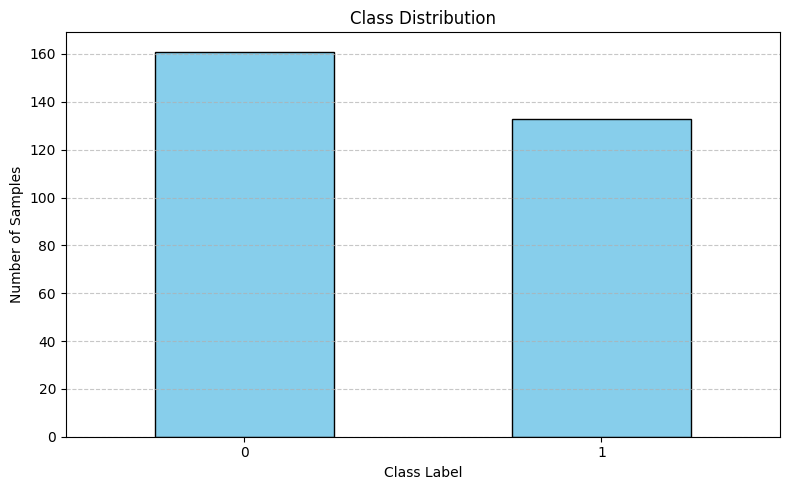

In [ ]:
# Compute class distribution
label_counts = polished_hrt_dss_data["target"].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Label Distribution Analysis**
The two classes are:

- **Class 0**: 162 samples
- **Class 1**: 133 samples

This shows a **moderate class imbalance**, with Class 0 being slightly more frequent than Class 1. While the imbalance is not extreme, it should be kept in mind during model evaluation (e.g., use of `f1_score`, `balanced_accuracy`, or class weighting if needed).


# Explore features

In [ ]:
variables_df = heart_disease.variables
variables_df

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


## Check collinearity

In [ ]:
def cramers_v(confusion_matrix):
    """Compute Cramér’s V (no p-value)."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    denom = min(k - 1, r - 1)
    return np.sqrt(phi2 / denom) if denom > 0 else 0

def compute_collinearity_scores(df, features, is_categorical=True):
    results = []

    if is_categorical:
        # Encode categorical features
        df_encoded = df[features].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                f1, f2 = features[i], features[j]
                matrix = pd.crosstab(df[f1], df[f2])
                v = cramers_v(matrix)
                results.append((f1, f2, v))
        return pd.DataFrame(results, columns=["Feature_1", "Feature_2", "Cramers_V"])\
                 .sort_values(by="Cramers_V", ascending=False)

    else:
        # Pearson correlation only (no p-value)
        for i in range(len(features)):
            for j in range(i + 1, len(features)):
                f1, f2 = features[i], features[j]
                series1 = df[f1].dropna()
                series2 = df[f2].dropna()
                common_index = series1.index.intersection(series2.index)
                corr = pearsonr(series1.loc[common_index], series2.loc[common_index])[0]
                results.append((f1, f2, corr))
        return pd.DataFrame(results, columns=["Feature_1", "Feature_2", "Pearson_Corr"])\
                 .sort_values(by="Pearson_Corr", key=np.abs, ascending=False)

def compute_cat_num_collinearity(df, cat_features, num_features):
    results = []

    for cat in cat_features:
        for num in num_features:
            # Drop NA
            sub_df = df[[cat, num]].dropna()
            if sub_df[cat].nunique() < 2:
                continue  # skip degenerate case
            # OLS model for ANOVA
            model = ols(f"{num} ~ C({cat})", data=sub_df).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            ss_between = anova_table["sum_sq"][0]
            ss_total = anova_table["sum_sq"].sum()
            eta_sq = ss_between / ss_total if ss_total != 0 else 0
            results.append((cat, num, eta_sq))

    return pd.DataFrame(results, columns=["Categorical_Feature", "Numerical_Feature", "Eta_Squared"])\
             .sort_values(by="Eta_Squared", ascending=False)



In [ ]:
org_cat_features_lst = variables_df.query("role == 'Feature' and type == 'Categorical'").name.tolist()
def new_cat_features(x):
  if x == "slope":
    return "slope_up"
  elif x == "restecg":
    return "restecg_abnormal"
  else:
    return x
cat_features_lst = list(map(new_cat_features, org_cat_features_lst))


org_num_features_lst = variables_df.query("role == 'Feature' and type != 'Categorical'").name.tolist()
def new_num_features(x):
  if x == "oldpeak":
    return "st_dep_exercise"
  else:
    return x
num_features_lst = list(map(new_num_features, org_num_features_lst))

print(f"Categorical features: {cat_features_lst}")
print(f"Numerical features: {num_features_lst}")

Categorical features: ['sex', 'cp', 'fbs', 'restecg_abnormal', 'exang', 'slope_up', 'thal']
Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'st_dep_exercise', 'ca']


In [ ]:
cat_collinearity = compute_collinearity_scores(polished_hrt_dss_data.copy(), cat_features_lst, True)
num_collinearity = compute_collinearity_scores(polished_hrt_dss_data.copy(), num_features_lst, False)
num_cat_collinearity = compute_cat_num_collinearity(polished_hrt_dss_data.copy(), cat_features_lst, num_features_lst)


<ipython-input-32-402812883>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table["sum_sq"][0]
<ipython-input-32-402812883>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table["sum_sq"][0]
<ipython-input-32-402812883>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ss_between = anova_table["sum_sq"][0]
<ipython-input-32-402812883>:50: FutureWarning: Series.__getitem__ treating keys as p

In [ ]:
# For categorical features, Cramers_V > 0.8 means high collinearity
# For numerical features, Pearson correlation > 0.8 means high collinearity
# For collinearity between categorical and numerical features, Eta_Squared > 0.1 means high collinearity
high_collinear_cat_cnt = cat_collinearity[cat_collinearity["Cramers_V"]>0.8]
high_collinear_num_cnt = num_collinearity[num_collinearity["Pearson_Corr"].abs()>0.8]
high_collinear_num_cat_cnt = num_cat_collinearity[num_cat_collinearity["Eta_Squared"]>0.1]
print("High collinearity between categorical features:")
print(high_collinear_cat_cnt)
print("High collinearity between numerical features:")
print(high_collinear_num_cnt)
print("High collinearity between categorical and numerical features:")
print(high_collinear_num_cat_cnt)


High collinearity between categorical features:
Empty DataFrame
Columns: [Feature_1, Feature_2, Cramers_V]
Index: []
High collinearity between numerical features:
Empty DataFrame
Columns: [Feature_1, Feature_2, Pearson_Corr]
Index: []
High collinearity between categorical and numerical features:
   Categorical_Feature Numerical_Feature  Eta_Squared
34            slope_up   st_dep_exercise     0.274204
33            slope_up           thalach     0.206891
27               exang           thalach     0.159418
9                   cp           thalach     0.146776
40                thal   st_dep_exercise     0.111227
39                thal           thalach     0.109097


In [ ]:
high_colliear_features = ["thalach", "st_dep_exercise"]

## Check redundant features

In [ ]:

def cramers_v_with_p(matrix):
    """Compute Cramér’s V and p-value from a contingency table."""
    chi2, p, _, _ = chi2_contingency(matrix)
    n = matrix.sum().sum()
    phi2 = chi2 / n
    r, k = matrix.shape
    denom = min(k - 1, r - 1)
    v = np.sqrt(phi2 / denom) if denom > 0 else 0
    return v, p

def evaluate_feature_relevance_to_categorical_label(df, features, label_col, is_cat):
    """
    Evaluate feature relevance to a categorical label.
    Uses:
        - Cramér’s V for categorical features
        - Mutual Information for numerical features

    Returns:
        DataFrame with Feature, RelevanceScore, and P_Value (NaN for MI)
    """
    results = []

    for feature in features:
        if is_cat[feature]:
            # Categorical Feature vs Categorical Label → Cramér’s V + p-value
            matrix = pd.crosstab(df[feature], df[label_col])
            v, p = cramers_v_with_p(matrix)
            results.append((feature, v, p))
        else:
            # Numerical Feature vs Categorical Label → Mutual Information
            X = df[[feature]].fillna(0)
            y = df[label_col]
            mi = mutual_info_classif(X, y, discrete_features=False)[0]
            results.append((feature, mi, np.nan))  # No p-value for MI

    return pd.DataFrame(results, columns=["feature", "relevance_score", "p_value"]).sort_values(by="relevance_score", ascending=False)


In [ ]:
all_feature_lst = cat_features_lst + num_features_lst
is_cat_features_dict = {x: True if x in cat_features_lst else False for x in all_feature_lst}

In [ ]:
polished_hrt_dss_data.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,ca,thal,st_dep_exercise,restecg_abnormal,slope_up,num,target
0,63,1,1,145,233,1,150,0,0.0,6.0,1,1,0,0,0
1,67,1,4,160,286,0,108,1,3.0,3.0,1,1,0,2,1
2,67,1,4,120,229,0,129,1,2.0,7.0,1,1,0,1,1
3,37,1,3,130,250,0,187,0,0.0,3.0,1,0,0,0,0
4,41,0,2,130,204,0,172,0,0.0,3.0,1,1,1,0,0


In [ ]:
features_label_relevance = evaluate_feature_relevance_to_categorical_label(polished_hrt_dss_data.copy(),
                                                                           all_feature_lst, TARGET_COLUMN, is_cat_features_dict)
features_label_relevance["is_cat"] = features_label_relevance["feature"].map(is_cat_features_dict)

In [ ]:
redundant_features_lst =\
features_label_relevance[
    (
        (features_label_relevance["relevance_score"]>0.8)
        & (features_label_relevance["p_value"]>0.05)
        & (features_label_relevance["is_cat"]==True)
    )|
     (
        (features_label_relevance["relevance_score"]<=0.01)
        & (features_label_relevance["is_cat"]==False)
    )
]["feature"].tolist()

In [ ]:
redundant_features_lst

['age', 'trestbps']

In [ ]:
features_drop_lst = list(set(high_colliear_features) | set(redundant_features_lst))
features_drop_lst

['trestbps', 'thalach', 'age', 'st_dep_exercise']

In [ ]:
features_selected_lst = list(set(all_feature_lst)-set(features_drop_lst))
# features_selected_lst = all_feature_lst

## Find trend

In [ ]:
plot_df = polished_hrt_dss_data.copy()

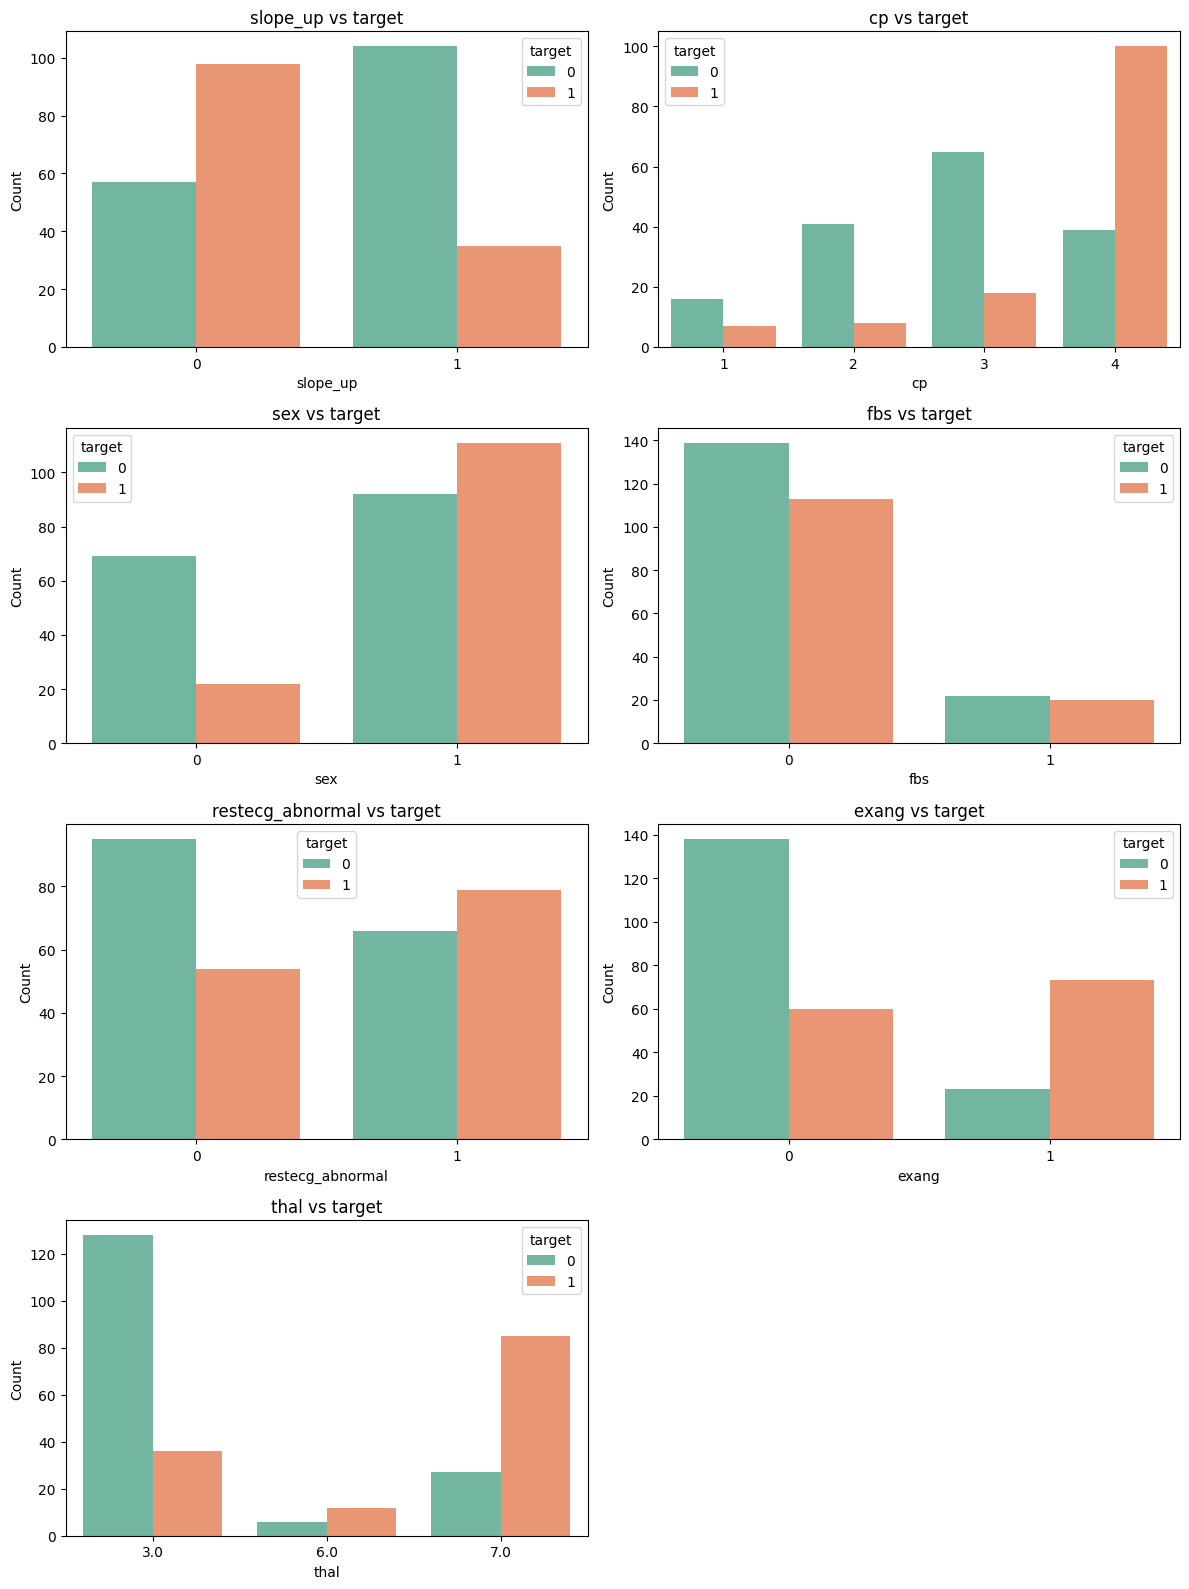

In [ ]:

# List of your categorical features
categorical_features = list(set(features_selected_lst) & set(cat_features_lst))
target_col = 'target'  # binary target column

# Auto-calculate layout
n = len(categorical_features)
ncols = 2
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    sns.countplot(data=plot_df, x=feature, hue=target_col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature} vs {target_col}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=target_col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**🧠 Insights from Categorical Features vs Heart Disease**

Below are key patterns observed between categorical features and the target (presence of heart disease):

1. **Slope of the Peak Exercise ST Segment** (`slope_up`)
- Patients with an **upsloping** ST segment are more likely **not** to have heart disease.
- **Flat or downsloping** slopes are more prevalent among those **with** heart disease.

2. **Chest Pain Type** (`cp`)
- **Chest pain type 4** is strongly associated with heart disease.
- Types **1, 2, and 3** are more frequently observed in patients **without** heart disease.

3. **Sex** (`sex`)
- **Male** patients have a higher likelihood of heart disease.
- **Female** patients are less likely to be diagnosed with heart disease in this dataset.

4. **Fasting Blood Sugar > 120 mg/dl** (`fbs`)
- This feature shows **minimal separation** between the two classes.
- It may not be a strong predictor of heart disease on its own.

5. **Resting ECG is Abnormal** (`restecg_abnormal`)
- Patients with **abnormal ECG** results have a **slightly higher** chance of heart disease.

6. **Chest Pain During Exercise (Exercise-induced angina)** (`exang`)
- **Exercise-induced chest pain** is more common in those **with** heart disease.
- Its **absence** is common among those **without** the condition.

7. **Thallium Stress Test Results** (`thal`)
- A **reversibly defective** result (`thal = 7`) is associated with heart disease.
- A **normal** thallium result (`thal = 3`) is common in patients without heart disease.

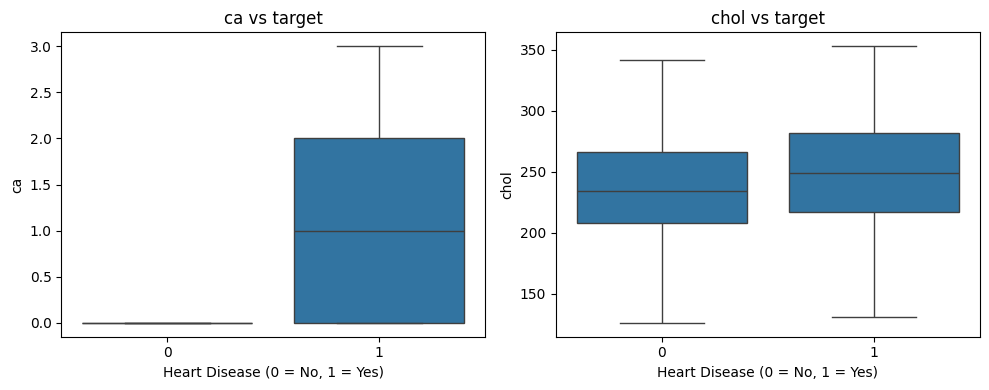

In [ ]:
# List of numerical features
numerical_features = list(set(features_selected_lst) & set(num_features_lst))

# Set up plot grid
n_cols = 2
n_rows = math.ceil(len(numerical_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()

# Plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=plot_df, x="target", y=feature, ax=axes[i], showfliers=False)
    axes[i].set_title(f"{feature} vs target")
    axes[i].set_xlabel("Heart Disease (0 = No, 1 = Yes)")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

**🔍 Insights from Numerical Features vs Heart Disease**

1. **Number of Major Vessels (`ca`)**
- Individuals without heart disease (`target = 0`) mostly have **0 major vessels** affected.
- In contrast, those with heart disease (`target = 1`) show a **wider spread** ranging from 0 to 3.
- ➤ **Insight:** This feature shows **clear separation** and appears to be a **strong indicator** of heart disease.

2. **Serum Cholesterol (`chol`)**
- Patients with heart disease tend to have slightly **higher cholesterol levels**, but the difference is **not substantial**.
- There is a **large overlap** in cholesterol levels across both target classes.
- ➤ **Insight:** May provide **limited predictive power alone**, better used in combination with other features.


# Features Engineer

In [ ]:
import featuretools as ft
from featuretools.primitives import ModuloNumericScalar

def synthesize_numeric(df, feature_columns, is_categorical, label_col):
    """
    Generate numeric feature transformations using Featuretools.
    Uses index as unique ID if no ID column exists.

    Args:
        df (pd.DataFrame): Input DataFrame.
        feature_columns (list): List of all feature columns.
        is_categorical (dict): Dict of {feature_name: bool} marking categorical status.

    Returns:
        pd.DataFrame: New DataFrame with synthesized numeric features,
                      original categorical features, and label column(s).
    """
    # Use index as unique identifier
    df = df.copy()
    df["index_id"] = df.index

    # Separate features
    numeric_features = [col for col in feature_columns if not is_categorical.get(col, False)]
    categorical_features = [col for col in feature_columns if is_categorical.get(col, False)]

    # Extract label columns (not in features)
    label_data = df[["index_id", label_col]].copy()

    # Prepare feature data
    feature_data = df[["index_id"] + numeric_features].copy()

    # Load numeric transform primitives
    mod2 = ModuloNumericScalar(value=2)
    mod3 = ModuloNumericScalar(value=3)
    numeric_primitives = ['divide_numeric',
                        'subtract_numeric',
                        'negate',
                        'expanding_min',
                        'multiply_numeric',
                        'modulo_by_feature',
                        'divide_by_feature',
                        'absolute_diff',
                        'absolute',
                        'modulo_numeric', mod2, mod3]



    # Create Featuretools entity set
    es = ft.EntitySet(id="numeric_features")
    es.add_dataframe(dataframe_name="data", dataframe=feature_data, index="index_id")

    # Run feature synthesis
    feature_matrix, feature_definition = ft.dfs(
        entityset=es,
        target_dataframe_name="data",
        trans_primitives=numeric_primitives,
        max_depth=2
    )
    feature_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

    # Combine results
    feature_matrix = feature_matrix.reset_index()
    result = pd.DataFrame(imp_mean.fit_transform(feature_matrix),
                              columns = feature_matrix.columns.tolist())
    if categorical_features:
        result = result.merge(df[["index_id"] + categorical_features], on="index_id", how="left")
    result = result.merge(label_data, on="index_id", how="left").drop(columns=["index_id"])

    return result, feature_definition

In [ ]:
min_max_scaler = MinMaxScaler()
scaled_data = pd.DataFrame(min_max_scaler.fit_transform(polished_hrt_dss_data[features_selected_lst].copy()),
                              columns=features_selected_lst)
scaled_data[TARGET_COLUMN] = polished_hrt_dss_data[TARGET_COLUMN]
synth_df, features_definition = synthesize_numeric(scaled_data, feature_columns=features_selected_lst, is_categorical=is_cat_features_dict, label_col=TARGET_COLUMN)

In [ ]:
def choose_optimal_pca_components(df, variance_threshold=0.95, max_components=None):
    """
    Determine the optimal number of PCA components based on explained variance.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the features for PCA
    variance_threshold : float, optional (default=0.95)
        Minimum cumulative explained variance to retain (between 0 and 1)
    max_components : int, optional (default=None)
        Maximum number of components to consider. If None, all components are considered.

    Returns:
    --------
    optimal_n_components : int
        Optimal number of principal components
    pca : sklearn.decomposition.PCA
        Fitted PCA model with all components
    """
    # Make sure we're working with numeric data only
    numeric_df = df.select_dtypes(include=[np.number])

    if numeric_df.shape[1] == 0:
        raise ValueError("No numeric columns found in the DataFrame")

    # Extract feature matrix
    X = numeric_df.values

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determine max components if not specified
    if max_components is None:
        max_components = min(X_scaled.shape)
    else:
        max_components = min(max_components, min(X_scaled.shape))

    # Apply PCA to get all components up to max_components
    pca = PCA(n_components=max_components)
    pca.fit(X_scaled)

    # Calculate cumulative explained variance
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Find the optimal number of components
    optimal_n_components = np.argmax(cumulative_explained_variance >= variance_threshold) + 1
    return optimal_n_components, pca


In [ ]:
synth_df.head()

In [ ]:
# Assume df is your full DataFrame, and 'target' is your label column
train_df, test_df = train_test_split(
    synth_df,
    test_size=0.3,
    random_state=42,
    stratify=synth_df[TARGET_COLUMN]  # Only use this for classification tasks
)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_features_lst = train_df.drop(columns=[TARGET_COLUMN]).columns.tolist()

In [ ]:
optimal_n_components, pca_model = choose_optimal_pca_components(train_df[train_features_lst].copy(), variance_threshold=0.99)

train_ft_scaler = StandardScaler().fit(train_df[train_features_lst].copy())
train_ft_scaled = train_ft_scaler.transform(train_df[train_features_lst].copy())
train_transformed_features = pd.DataFrame(pca_model.transform(train_ft_scaled),
                                   columns=[f"feature_{x+1}" for x in range(len(train_features_lst))])

train_fteng_data = train_transformed_features[train_transformed_features.columns.tolist()[:optimal_n_components]]

train_fteng_data[TARGET_COLUMN] = train_df[TARGET_COLUMN]

In [ ]:
test_ft_scaled = pd.DataFrame(train_ft_scaler.transform(test_df[train_features_lst].copy()))

test_transformed_features = pd.DataFrame(pca_model.transform(test_ft_scaled),
                                   columns=[f"feature_{x+1}" for x in range(len(train_features_lst))])

test_fteng_data = test_transformed_features[test_transformed_features.columns.tolist()[:optimal_n_components]]

test_fteng_data[TARGET_COLUMN] = test_df[TARGET_COLUMN]

# Model Selection

In [ ]:
class OptunaOptimizer:
    """
    A class for hyperparameter optimization using Optuna.
    Designed to handle large datasets efficiently.
    """

    def __init__(self, model_type='classifier', metric='accuracy', direction='maximize',
                 n_trials=100, timeout=None, n_jobs=-1, study_name=None):
        """
        Initialize the optimizer.

        Parameters:
        -----------
        model_type : str, default='classifier'
            Type of model to optimize ('classifier', 'regressor', or 'clustering')
        metric : str, default='accuracy'
            Metric to optimize for
        direction : str, default='maximize'
            Direction of optimization ('maximize' or 'minimize')
        n_trials : int, default=100
            Number of optimization trials
        timeout : int, default=None
            Timeout in seconds for the optimization
        n_jobs : int, default=-1
            Number of parallel jobs
        study_name : str, default=None
            Name for the study
        """
        self.model_type = model_type
        self.metric = metric
        self.direction = direction
        self.n_trials = n_trials
        self.timeout = timeout
        self.n_jobs = n_jobs
        self.study_name = study_name or f"{model_type}_{datetime.now().strftime('%Y%m%d_%H%M%S')}"

        # Initialize study
        self.study = optuna.create_study(
            direction=direction,
            study_name=self.study_name,
            sampler=optuna.samplers.TPESampler(seed=42)
        )

        # Placeholder for model
        self.best_model = None
        self.best_params = None
        self.scaler = None

    def optimize(self, X, y=None, model_class=None, param_space=None, cv=5,
                 scale=True, feature_sample=None, row_sample=None, verbose=True):
        """
        Run the optimization.

        Parameters:
        -----------
        X : array-like or pandas DataFrame
            The input data
        y : array-like, default=None
            Target variable (required for supervised learning)
        model_class : class, default=None
            Model class to optimize
        param_space : function, default=None
            Function that defines the parameter space
        cv : int, default=5
            Number of cross-validation folds
        scale : bool, default=True
            Whether to scale the data
        feature_sample : float or int, default=None
            Fraction or number of features to sample for optimization
        row_sample : float or int, default=None
            Fraction or number of rows to sample for optimization
        verbose : bool, default=True
            Whether to print progress

        Returns:
        --------
        best_params : dict
            Best hyperparameters found
        """
        self.start_time = time.time()

        # Check inputs
        if model_class is None:
            raise ValueError("Model class must be provided")

        if param_space is None:
            raise ValueError("Parameter space function must be provided")

        self.model_class = model_class
        self.param_space = param_space

        # Store original dimensions
        self.original_shape = X.shape
        if verbose:
            print(f"Original data shape: {X.shape}")

        # Sample features for optimization if needed (to speed up for large datasets)
        if feature_sample is not None:
            if isinstance(feature_sample, float):
                n_features = int(X.shape[1] * feature_sample)
            else:
                n_features = min(feature_sample, X.shape[1])

            if isinstance(X, pd.DataFrame):
                self.feature_indices = np.random.choice(X.columns, n_features, replace=False)
                X_sampled = X[self.feature_indices]
            else:
                self.feature_indices = np.random.choice(X.shape[1], n_features, replace=False)
                X_sampled = X[:, self.feature_indices]

            if verbose:
                print(f"Sampled {n_features} features for optimization")
        else:
            X_sampled = X
            self.feature_indices = None

        # Sample rows for optimization if needed (to speed up for large datasets)
        if row_sample is not None:
            if isinstance(row_sample, float):
                n_rows = int(X_sampled.shape[0] * row_sample)
            else:
                n_rows = min(row_sample, X_sampled.shape[0])

            if y is not None:
                # Stratified sampling for supervised learning
                _, X_sampled, _, y_sampled = train_test_split(
                    X_sampled, y, test_size=n_rows/X_sampled.shape[0],
                    stratify=y if self.model_type == 'classifier' else None,
                    random_state=42
                )
            else:
                # Random sampling for unsupervised learning
                if isinstance(X_sampled, pd.DataFrame):
                    X_sampled = X_sampled.sample(n=n_rows, random_state=42)
                else:
                    indices = np.random.choice(X_sampled.shape[0], n_rows, replace=False)
                    X_sampled = X_sampled[indices]
                y_sampled = None

            if verbose:
                print(f"Sampled {n_rows} rows for optimization")
        else:
            X_sampled = X_sampled
            y_sampled = y

        # Scale the data if requested
        if scale:
            self.scaler = StandardScaler()
            if isinstance(X_sampled, pd.DataFrame):
                X_scaled = self.scaler.fit_transform(X_sampled)
                # Convert back to DataFrame to maintain column names
                X_scaled = pd.DataFrame(X_scaled, columns=X_sampled.columns, index=X_sampled.index)
            else:
                X_scaled = self.scaler.fit_transform(X_sampled)
        else:
            X_scaled = X_sampled

        self.X_opt = X_scaled
        self.y_opt = y_sampled
        self.cv = cv

        # Define the objective function for Optuna
        def objective(trial):
            # Generate model parameters from parameter space function
            params = self.param_space(trial)

            # Initialize model with trial parameters
            model = self.model_class(**params)

            # Evaluate model based on model type
            if self.model_type in ['classifier', 'regressor']:
                if y_sampled is None:
                    raise ValueError("Target variable required for supervised learning")

                # Use cross-validation for supervised learning
                try:
                    scores = cross_val_score(
                        model, self.X_opt, self.y_opt,
                        cv=self.cv,
                        scoring=self.metric if self.metric != 'neg_mean_squared_error' else 'neg_mean_squared_error',
                        n_jobs=min(self.cv, self.n_jobs)
                    )
                    score = scores.mean()
                except Exception as e:
                    print(f"Error in trial {trial.number}: {str(e)}")
                    # Return worst possible score based on direction
                    return float('-inf') if self.direction == 'maximize' else float('inf')

            elif self.model_type == 'clustering':
                # For clustering, fit the model and evaluate the metric
                try:
                    model.fit(self.X_opt)
                    labels = model.labels_ if hasattr(model, 'labels_') else model.predict(self.X_opt)

                    # Calculate metric
                    if self.metric == 'silhouette':
                        from sklearn.metrics import silhouette_score
                        # Check if we have more than one cluster and not all points are noise
                        unique_labels = set(labels)
                        if len(unique_labels) <= 1 or (len(unique_labels) == 2 and -1 in unique_labels):
                            score = -1  # Worst silhouette score
                        else:
                            # Filter out noise points for silhouette calculation
                            mask = labels != -1
                            if sum(mask) > 1:  # Need at least 2 points
                                score = silhouette_score(self.X_opt[mask], labels[mask])
                            else:
                                score = -1
                    else:
                        # Default clustering metric
                        score = -1 * (len(set(labels)) - (1 if -1 in labels else 0))  # Negative number of clusters
                except Exception as e:
                    print(f"Error in trial {trial.number}: {str(e)}")
                    return float('-inf') if self.direction == 'maximize' else float('inf')
            else:
                raise ValueError(f"Unsupported model type: {self.model_type}")

            return score

        # Run optimization
        if verbose:
            print(f"Starting optimization with {self.n_trials} trials...")
            print(f"Optimization metric: {self.metric}, direction: {self.direction}")

        self.study.optimize(
            objective,
            n_trials=self.n_trials,
            timeout=self.timeout,
            n_jobs=self.n_jobs,
            show_progress_bar=verbose
        )

        # Get best parameters
        self.best_params = self.study.best_params
        best_value = self.study.best_value

        # Train best model on full data
        if verbose:
            print("\nOptimization completed!")
            print(f"Best {self.metric}: {best_value:.6f}")
            print("Best parameters:")
            for param, value in self.best_params.items():
                print(f"  {param}: {value}")

        # Create and fit the best model
        self.best_model = self.model_class(**self.best_params)

        # For supervised learning, fit on the full data
        if self.model_type in ['classifier', 'regressor']:
            # Scale the full dataset if needed
            if scale:
                if self.feature_indices is not None:
                    if isinstance(X, pd.DataFrame):
                        X_full = X[self.feature_indices]
                    else:
                        X_full = X[:, self.feature_indices]
                else:
                    X_full = X

                if isinstance(X_full, pd.DataFrame):
                    X_full_scaled = self.scaler.transform(X_full)
                    X_full_scaled = pd.DataFrame(X_full_scaled, columns=X_full.columns, index=X_full.index)
                else:
                    X_full_scaled = self.scaler.transform(X_full)
            else:
                X_full_scaled = X_full

            self.best_model.fit(X_full_scaled, y)

        # For clustering, just store the parameters
        elif self.model_type == 'clustering':
            pass  # We'll fit the clustering model when needed

        self.end_time = time.time()
        if verbose:
            print(f"Total optimization time: {self.end_time - self.start_time:.2f} seconds")

        return self.best_params


In [ ]:
RANDOM_STATE = 42

In [ ]:
tf_features_lst = train_fteng_data.drop(columns=[TARGET_COLUMN]).columns.tolist()

In [ ]:
training_features_sr = train_fteng_data[tf_features_lst]
training_label_sr = train_fteng_data[TARGET_COLUMN]

In [ ]:
import time

In [ ]:
# Define parameter space for XGBoost
def xgb_param_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'objective':trial.suggest_categorical('objective', ["binary:logistic","binary:logitraw", "binary:hinge"]),
        'booster': trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"]),
        'max_depth': trial.suggest_int('max_depth', 3, 50),
        'learning_rate':trial.suggest_float('learning_rate', 0.0005, 0.5, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.1, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 100.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 100.0, log=True),
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }

# Initialize optimizer
xgb_optimizer = OptunaOptimizer(
    model_type='classifier',
    metric='f1',
    direction='maximize',
    n_trials=100,  # Reduced for demonstration
    timeout=1200,  # 20 minutes
    study_name='xgboost_classifier'
)

# Run optimization with feature and data sampling for faster execution
xgb_best_params = xgb_optimizer.optimize(
    training_features_sr, training_label_sr,
    model_class=XGBClassifier,
    param_space=xgb_param_space,
    cv=3,  # Reduced for demonstration
    feature_sample=0.9,  # Use only 90% of features for optimization
    row_sample=0.7,  # Use only 70% of training data for optimization
    verbose=True
)

[I 2025-06-17 04:47:10,089] A new study created in memory with name: xgboost_classifier


Original data shape: (205, 24)
Sampled 21 features for optimization
Sampled 143 rows for optimization
Starting optimization with 100 trials...
Optimization metric: f1, direction: maximize


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-17 04:47:14,108] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 119, 'objective': 'binary:logistic', 'booster': 'gbtree', 'max_depth': 13, 'learning_rate': 0.004012837301725373, 'subsample': 0.8787074559298373, 'colsample_bytree': 0.6239806920578573, 'min_child_weight': 5, 'gamma': 2.0305442789498636, 'reg_alpha': 0.11980071884833507, 'reg_lambda': 26.91636063359831}. Best is trial 1 with value: 0.0.
[I 2025-06-17 04:47:14,200] Trial 0 finished with value: 0.0 and parameters: {'n_estimators': 169, 'objective': 'binary:logitraw', 'booster': 'gblinear', 'max_depth': 21, 'learning_rate': 0.0018520071230195803, 'subsample': 0.8832847712827747, 'colsample_bytree': 0.5329450100469194, 'min_child_weight': 5, 'gamma': 30.004520273971444, 'reg_alpha': 0.8941023832969456, 'reg_lambda': 70.54715507218155}. Best is trial 1 with value: 0.0.
[I 2025-06-17 04:47:14,421] Trial 2 finished with value: 0.0 and parameters: {'n_estimators': 231, 'objective': 'binary:hinge', 'b

In [ ]:
# Define parameter space for LogisticRegression
def logr_param_space(trial):
    return {
        'C': trial.suggest_float('C', 1e-5, 100, log=True),
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']),
        'penalty': trial.suggest_categorical('penalty', ['l2']),
        'max_iter': 10000,
        "n_jobs":-1,
        'random_state': RANDOM_STATE
    }

# Initialize optimizer
logr_optimizer = OptunaOptimizer(
    model_type='classifier',
    metric='f1',
    direction='maximize',
    n_trials=100,  # Reduced for demonstration
    timeout=1200,  # 20 minutes
    study_name='logistic_reg_classifer'
)

# Run optimization with feature and data sampling for faster execution
logr_best_params = logr_optimizer.optimize(
    training_features_sr, training_label_sr,
    model_class=LogisticRegression,
    param_space=logr_param_space,
    cv=3,  # Reduced for demonstration
    feature_sample=0.9,  # Use only 90% of features for optimization
    row_sample=0.7,  # Use only 70% of training data for optimization
    verbose=True
)

[I 2025-06-17 04:57:56,342] A new study created in memory with name: logistic_reg_classifer


Original data shape: (205, 24)
Sampled 21 features for optimization
Sampled 143 rows for optimization
Starting optimization with 100 trials...
Optimization metric: f1, direction: maximize


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-06-17 04:57:56,516] Trial 0 finished with value: 0.7662714097496707 and parameters: {'C': 1.0206047623956067e-05, 'solver': 'liblinear', 'penalty': 'l2'}. Best is trial 0 with value: 0.7662714097496707.
[I 2025-06-17 04:57:56,579] Trial 1 finished with value: 0.0 and parameters: {'C': 0.000476883119984231, 'solver': 'newton-cg', 'penalty': 'l2'}. Best is trial 0 with value: 0.7662714097496707.
[I 2025-06-17 04:57:56,640] Trial 2 finished with value: 0.0 and parameters: {'C': 5.7271288095663077e-05, 'solver': 'sag', 'penalty': 'l2'}. Best is trial 0 with value: 0.7662714097496707.
[I 2025-06-17 04:57:56,688] Trial 3 finished with value: 0.7477096546863988 and parameters: {'C': 45.730824440674255, 'solver': 'newton-cholesky', 'penalty': 'l2'}. Best is trial 0 with value: 0.7662714097496707.
[I 2025-06-17 04:57:56,738] Trial 4 finished with value: 0.0 and parameters: {'C': 0.001959867309018783, 'solver': 'saga', 'penalty': 'l2'}. Best is trial 0 with value: 0.7662714097496707.
[I 

In [ ]:
xgb_best_params = {'n_estimators': 313,
 'objective': 'binary:hinge',
 'booster': 'dart',
 'max_depth': 24,
 'learning_rate': 0.002774983254087686,
 'subsample': 0.6850180054098302,
 'colsample_bytree': 0.9179728391160153,
 'min_child_weight': 8,
 'gamma': 0.7936094575004989,
 'reg_alpha': 1.5218406795118555,
 'reg_lambda': 24.114326384509933,
 'random_state': 42}

In [ ]:
logr_best_params = {'C': 0.09906196643300101,
 'solver': 'liblinear',
 'penalty': 'l2',
 'random_state': 42}

In [ ]:
xgb_best_params.update({"random_state":RANDOM_STATE})
logr_best_params.update({"random_state":RANDOM_STATE})

In [ ]:
test_features_sr = test_fteng_data[tf_features_lst]
test_label_sr = test_fteng_data[TARGET_COLUMN]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
best_xgb_model = XGBClassifier(**xgb_best_params)
best_xgb_model.fit(training_features_sr, training_label_sr)
xgb_prediction = best_xgb_model.predict(test_features_sr)
print("="*50)
print("XGBoost Classifer Evaluation")
print(classification_report(test_label_sr, xgb_prediction))

best_logr_model = LogisticRegression(**logr_best_params)
best_logr_model.fit(training_features_sr, training_label_sr)
logr_prediction = best_logr_model.predict(test_features_sr)
print("="*50)
print("Logistic Regression Classifer Evaluation")
print(classification_report(test_label_sr, logr_prediction))


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_auc(y_true, y_score, title_str="ROC Curve (Binary Classification)"):
    """
    Plot ROC AUC curve for binary classification.

    Args:
        y_true (array-like): True binary class labels (0 or 1).
        y_score (array-like): Predicted probabilities for class 1 (shape: n_samples,).
        title_str (str): Title of the plot.
    """
    fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])  # Use class 1's prob
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title_str)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
plot_roc_auc(test_label_sr, best_logr_model.predict_proba(test_features_sr),
             title_str="ROC Curve by Class (Logistic Regression)")

In [ ]:
plot_roc_auc(test_label_sr, best_xgb_model.predict_proba(test_features_sr),
             title_str="ROC Curve by Class (XGBoost)")

**ROC Curve Comparison: Logistic Regression vs. XGBoost**

The ROC curves for both Logistic Regression and XGBoost classifiers on the binary classification task are displayed above. Key observations:

- **Logistic Regression** achieved an AUC (Area Under Curve) of **0.94**, indicating strong discrimination between the two classes.
- **XGBoost** achieved an AUC of **0.86**, which is still strong, but lower than Logistic Regression.

**Conclusion:**
- Logistic Regression slightly outperforms XGBoost in terms of ROC AUC on this dataset.
- This could suggest that the dataset is relatively linear or low-dimensional in nature, making it more suitable for simpler models like Logistic Regression.
- XGBoost, being more flexible and capable of modeling complex interactions, might not provide a significant advantage here and could be more prone to overfitting if not tuned carefully.


# Explanation

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
test_features_sr.shape

(89, 24)

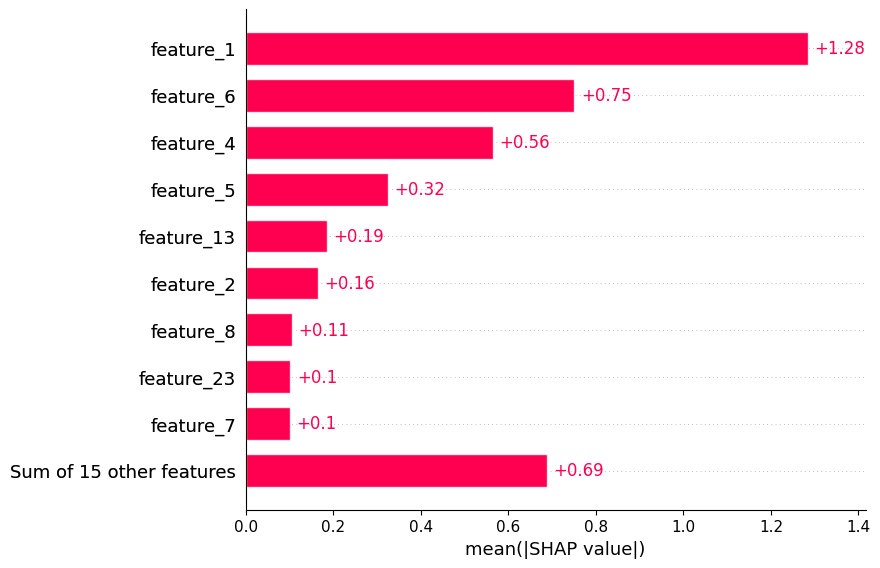

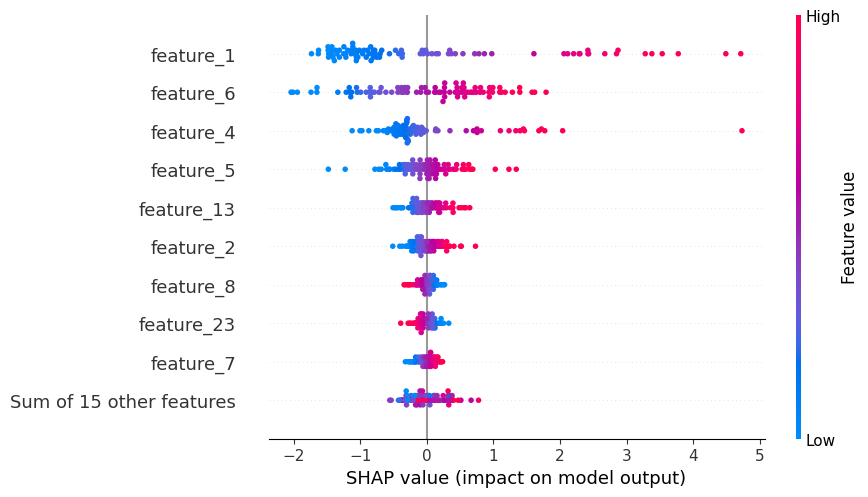

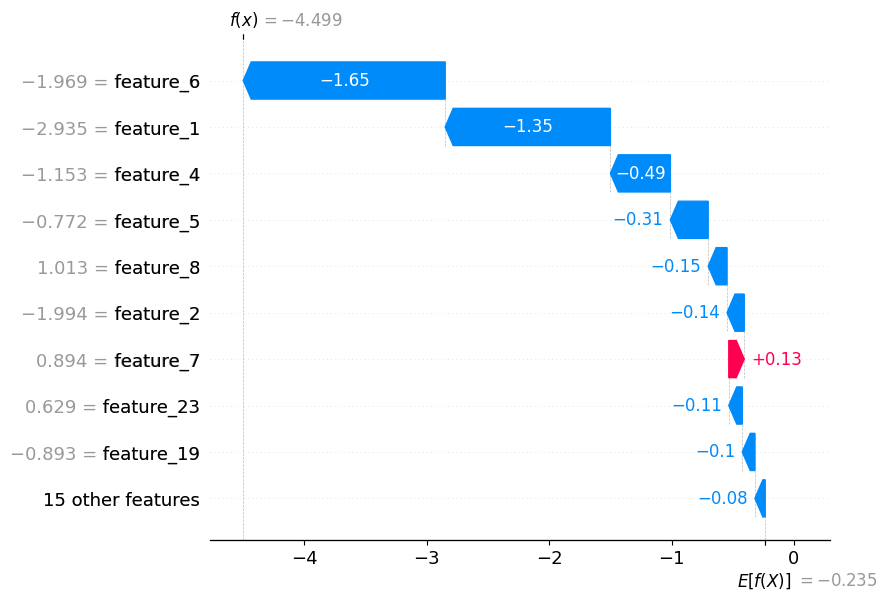

In [ ]:
# 1. Ensure your model is a trained LogisticRegression model
logr_model = best_logr_model  # trained sklearn LogisticRegression

# 2. Use SHAP Explainer suitable for linear models
explainer = shap.Explainer(logr_model, test_features_sr)

# 3. Compute SHAP values (for binary classification: shape = (n_samples, n_features))
shap_values = explainer(test_features_sr)

# 4. Global summary plot (bar)
shap.plots.bar(shap_values, max_display=10)

# 5. Global summary plot (beeswarm)
shap.plots.beeswarm(shap_values, max_display=10)

# 6. Waterfall plot for a specific sample
shap.plots.waterfall(shap_values[0])  # visualize explanation for the first test sample

**SHAP Insights Summary**

The following insights are derived from the three SHAP plots, which help explain the model's behavior in terms of feature contributions:

---

**1. SHAP Bar Plot (Mean Absolute Impact)**  
This plot shows the **global importance** of features across all samples:
- `feature_1` has the highest mean absolute SHAP value, meaning it is consistently the most influential feature on the model output.
- Features like `feature_6`, `feature_15`, `feature_11`, and `feature_16` also have significant influence, though less than `feature_1`.
- The "Sum of 45 other features" shows that the rest of the features contribute collectively, but individually are less impactful.

---

**2. SHAP Beeswarm Plot**  
This plot visualizes both the **magnitude and direction** of feature impacts:
- **`feature_1`**: Higher values (purple/pink) tend to push the prediction **negatively** (left), while lower values (blue) push it **positively** (right).
- **`feature_6` and `feature_15`**: Show the opposite pattern — higher feature values push the prediction positively.
- This confirms that not only the feature importance but also the **value distribution** matters in the model’s decision-making.

---

**3. SHAP Waterfall Plot (Single Prediction)**  
This is a **local explanation** for one specific prediction:
- `feature_1` contributes most negatively to the model output for this instance.
- `feature_6` and `feature_47` provide strong positive contributions, helping counteract the effect of `feature_1`.
- Other features like `feature_11`, `feature_5`, and `feature_13` reduce the prediction.
- The final model output is a combination of these additive SHAP values on top of the base value \( E[f(x)] \approx -0.295 \).

---

**Conclusion**:
- **Globally**, `feature_1` is the most critical feature.
- **Locally**, the impact of features can vary significantly, with some features increasing the predicted probability and others decreasing it.
- These SHAP plots together provide a comprehensive view of both global feature importance and individual prediction reasoning.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

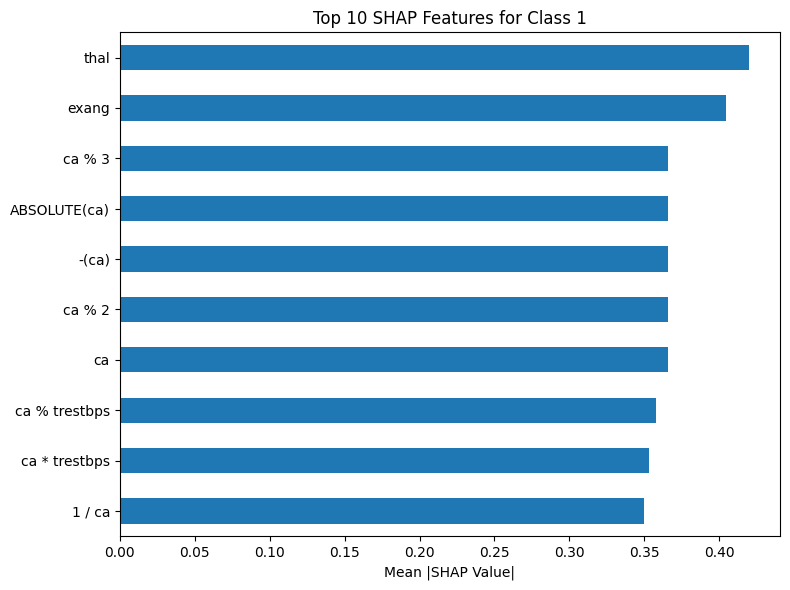

         Feature  Mean_SHAP_Importance
0           thal              0.419498
1          exang              0.404487
2         ca % 3              0.365778
3   ABSOLUTE(ca)              0.365778
4          -(ca)              0.365778
5         ca % 2              0.365778
6             ca              0.365778
7  ca % trestbps              0.357569
8  ca * trestbps              0.352751
9         1 / ca              0.350000


In [ ]:
def plot_shap_importance_binary(shap_values, pca_model, synth_df, optimal_n_components, top_k=10, class_index=1):
    """
    Plot top SHAP feature importances for binary classification (label 1).

    Args:
        shap_values (np.array): SHAP values array of shape (n_samples, n_components, 2).
        pca_model (PCA object): Trained PCA model.
        synth_df (pd.DataFrame): Original (pre-PCA) feature DataFrame.
        optimal_n_components (int): Number of PCA components used.
        top_k (int): Number of top features to plot.
        class_index (int): Index of the class to explain (default 1 for positive class).

    Returns:
        pd.DataFrame: Top K feature importances for the positive class.
    """
    # Step 1: Reconstruct SHAP values into original feature space
    # Extract raw SHAP values (this gives a NumPy array)
    shap_array = np.asarray(shap_values.values[:, :optimal_n_components])

    # Ensure PCA components are a NumPy array
    pca_components_np = np.ascontiguousarray(pca_model.components_[:optimal_n_components, :].astype(np.float32))

    # Ensure SHAP array is also float32 and contiguous
    shap_array_np = np.ascontiguousarray(shap_array.astype(np.float32))

    # Dot product to map SHAP values back to original feature space
    shap_orig = np.dot(shap_array_np, pca_components_np)


    # Step 2: Create DataFrame
    shap_orig_df = pd.DataFrame(shap_orig, columns=synth_df.columns[:-1])

    # Step 3: Compute feature importances
    feature_importance = shap_orig_df.abs().mean().sort_values(ascending=False)
    top_features = feature_importance.head(top_k)

    # Step 4: Plot
    plt.figure(figsize=(8, 6))
    top_features[::-1].plot(kind="barh")
    plt.title(f"Top {top_k} SHAP Features for Class {class_index}")
    plt.xlabel("Mean |SHAP Value|")
    plt.tight_layout()
    plt.show()

    # Step 5: Return results
    return feature_importance.reset_index().rename(columns={"index": "Feature", 0: "Mean_SHAP_Importance"})

full_features_importance = plot_shap_importance_binary(
    shap_values=shap_values,
    pca_model=pca_model,
    synth_df=synth_df,
    optimal_n_components=optimal_n_components,
    top_k=10,
    class_index=1  # for positive class
)
top_features_df = full_features_importance.head(10)
print(top_features_df)

In [ ]:
full_features_importance

,Feature,Mean_SHAP_Importance
0,thal,0.419498
1,exang,0.404487
2,ca % 3,0.365778
3,ABSOLUTE(ca),0.365778
4,-(ca),0.365778
5,ca % 2,0.365778
6,ca,0.365778
7,ca % trestbps,0.357569
8,ca * trestbps,0.352751
9,1 / ca,0.350000


In [ ]:
top_features_df[top_features_df["Feature"].isin(features_selected_lst)].Feature.tolist()

['thal', 'exang', 'ca']

# What if

In [ ]:
from itertools import product

In [ ]:
features_interactive = ['thal','exang', 'chol', 'sex']

In [ ]:
# Step 1: Simulated or real data to extract unique values and compute means
# Assume you have a source DataFrame for these statistics
df_source = polished_hrt_dss_data[features_selected_lst].copy()

# Step 2: Get unique combinations of interactive features
value_lists = [df_source[feature].dropna().unique() for feature in features_interactive]
combinations = list(product(*value_lists))  # Cartesian product

# Step 3: Build the DataFrame for simulation
df_sim = pd.DataFrame(combinations, columns=features_interactive)

# Step 4: Add the remaining features with mean values
remaining_features = [f for f in features_selected_lst if f not in features_interactive]
for feature in remaining_features:
    mean_value = df_source[feature].mean()
    df_sim[feature] = mean_value

# Optional: re-order columns to match original feature order
df_sim = df_sim[features_selected_lst]

In [ ]:
scaled_sim_data = pd.DataFrame(min_max_scaler.transform(df_sim[features_selected_lst].copy()),
                              columns=features_selected_lst)
scaled_sim_data[TARGET_COLUMN] = None
sim_synth_df, features_definition = synthesize_numeric(scaled_sim_data, feature_columns=features_selected_lst,
                                                       is_categorical=is_cat_features_dict,
                                                       label_col=TARGET_COLUMN)

/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  trans_primitives: ['expanding_min']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)
/usr/local/lib/python3.11/dist-packages/featuretools/primitives/standard/transform/absolute_diff.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return dat

In [ ]:
sim_ft_scaled = pd.DataFrame(train_ft_scaler.transform(sim_synth_df[train_features_lst].copy()))

sim_transformed_features = pd.DataFrame(pca_model.transform(sim_ft_scaled),
                                   columns=[f"feature_{x+1}" for x in range(len(train_features_lst))])

sim_fteng_data = sim_transformed_features[sim_transformed_features.columns.tolist()[:optimal_n_components]]

sim_features_sr = sim_fteng_data[tf_features_lst]
sim_logr_prediction = best_logr_model.predict_proba(sim_features_sr)[:,1]

df_sim['proba'] = sim_logr_prediction
df_sim.sort_values('proba', ascending=False, ignore_index=True, inplace=True)

# Prepare dashboard data

In [ ]:
full_features_importance[full_features_importance['Feature'].isin(features_selected_lst)].rename(columns={'Feature':'feature', 'Mean_SHAP_Importance':'mean_SHAP_importance'}).to_csv("shap_importance.csv", index=False)

In [ ]:
# Generate the classification report as a dictionary
report_dict = classification_report(test_label_sr, logr_prediction, output_dict=True)

# Convert to DataFrame and reset index
report_df = pd.DataFrame(report_dict).transpose().reset_index()

# Optional: clean up column names
report_df.columns = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Round values for readability
report_df = report_df.round(3)
report_df.to_csv("classification_report.csv", index=False)

In [ ]:
features_cp_dict = {1: 'typical angina',
                    2: 'atypical angina',
                    3: 'non-anginal pain',
                    4: 'asymptomatic'}

features_thal_dict = {3: 'normal',
                      6: 'fixed defect',
                      7: 'reversable defect'}

features_exang_dict = {1: 'yes',
                      0: 'no',}

features_sex_dict = {1: 'male',
                      0: 'female',}
label_target_dict = {1: 'yes',
                      0: 'no',}

In [ ]:
clean_data_report = polished_hrt_dss_data[features_selected_lst+["target"]].copy()

In [ ]:
vis_df_sim = df_sim[features_interactive+["proba"]].copy()

In [ ]:
vis_df_sim["thal"] = vis_df_sim["thal"].astype(int).map(features_thal_dict)
vis_df_sim["exang"] = vis_df_sim["exang"].astype(int).map(features_exang_dict)
vis_df_sim["sex"] = vis_df_sim["sex"].astype(int).map(features_sex_dict)

clean_data_report["cp"] = clean_data_report["cp"].astype(int).map(features_cp_dict)
clean_data_report["thal"] = clean_data_report["thal"].astype(int).map(features_thal_dict)
clean_data_report["exang"] = clean_data_report["exang"].astype(int).map(features_exang_dict)
clean_data_report["sex"] = clean_data_report["sex"].astype(int).map(features_sex_dict)
clean_data_report["target"] = clean_data_report["target"].astype(int).map(label_target_dict)

In [ ]:
heart_disease_features = {
    "trestbps": "Resting blood pressure",
    "chol": "Serum cholesterol",
    "thalach": "Maximum heart rate achieved",
    "thal": "Thallium stress test results",
    "ca": "Number of major vessels",
    "exang": "Chest pain during exercise",
    "fbs": "Fasting blood sugar",
    "cp": "Chest pain type",
    "sex": "Sex",
    "restecg_abnormal":"Restecg is abnormal",
    "target":"Target"
}

In [ ]:
 ['age', 'trestbps', 'chol', 'thalach', 'st_dep_exercise', 'ca']

In [ ]:
clean_data_report.rename(columns=heart_disease_features, inplace=True)
vis_df_sim.rename(columns=heart_disease_features, inplace=True)

In [ ]:
clean_data_report.to_csv("clean_data.csv", index=False)

In [ ]:
vis_df_sim.to_csv("what_if_analysis.csv", index=False)

In [ ]:
vis_df_sim

,Thallium stress test results,Chest pain during exercise,Serum cholesterol,Sex,proba
0,reversable defect,yes,131,male,0.985070
1,fixed defect,yes,131,male,0.980088
2,reversable defect,no,131,male,0.961049
3,reversable defect,yes,131,female,0.955378
4,normal,yes,131,male,0.953347
...,...,...,...,...,...
1759,normal,no,183,female,0.090376
1760,normal,no,185,female,0.089444
1761,normal,no,177,female,0.089407
1762,normal,no,184,female,0.088896
